<a href="https://colab.research.google.com/github/Kinbloom/Financial-Inclusion-in-East-Africa/blob/master/Financial_Inclusion_Week_2_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial Inclusion in East Africa - Review

#### Based on Kenya,Uganda,Tanzania and Rwanda.

**Research Question**

What are the demographic factors to determine whether an individual has or uses a bank account or not? 

Here we test the variables that are significant either negatively or positively in determining their relationship with the dependent variable (has a bank account or not).

**What is our hypothesis?**

Null Hypothesis : The likelihood of having a bank account is dependent on the various factors included in the study (i.e. Employment Status, Marriage Status, Education Status etc.)

Alternative Hypothesis : The likelihood of having a bank account is not dependent on the various factors included in the study.

**What is the metric for success?**


*   Study is considered successful if the null hypothesis is true.
*   Design a model with an accuracy prediction of 85% and above for those with(out) bank accounts.





### Import the necessary libraries.

In [0]:
#Import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

### Load the datasets to be used for the Exploratory Analysis.

In [0]:
#Load the Dataset that describes the dataset.

variableDataset = pd.read_csv('http://bit.ly/VariableDefinitions')
variableDataset

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [0]:
#Load the Financial Dataset 

FinancialDataset = pd.read_csv('http://bit.ly/FinancialDataset')
FinancialDataset.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
#Rename the columns ; one-worded column names 

FinancialDataset.columns = FinancialDataset.columns.str.lower().str.replace(' ', '_')

### Data Exploration

In [0]:
#Find out the number of entries in each column, column data type

FinancialDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
has_a_bank_account        23488 non-null object
type_of_location          23509 non-null object
cell_phone_access         23513 non-null object
household_size            23496 non-null float64
respondent_age            23490 non-null float64
gender_of_respondent      23490 non-null object
the_relathip_with_head    23520 non-null object
marital_status            23492 non-null object
level_of_educuation       23495 non-null object
type_of_job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [0]:
#Find out if there are missing values.

FinancialDataset.isnull().sum()

country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [0]:
#Drop the rows that contain any form of missing or null value since they may result in inconsistencies.

FinancialDataset.dropna(inplace = True)

In [0]:
#Check to see if there are any null values. 

FinancialDataset.isnull().sum()

country                   0
year                      0
uniqueid                  0
has_a_bank_account        0
type_of_location          0
cell_phone_access         0
household_size            0
respondent_age            0
gender_of_respondent      0
the_relathip_with_head    0
marital_status            0
level_of_educuation       0
type_of_job               0
dtype: int64

In [0]:
#What unique values are there in each column entry in the dataset?

for i in FinancialDataset.columns:
 print(FinancialDataset[i].unique())
 print ("\n")

['Kenya' 'Rwanda' 'Tanzania' 'Uganda']


[2018 2029 2056 2016 2039 2017]


['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']


['Yes' 'No']


['Rural' 'Urban']


['Yes' 'No']


[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21.  0.
 18. 17. 20.]


[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  93.  74.  88.  90.
  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.  99.
 100.]


['Female' 'Male']


['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']


['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']


['Secondary education' 'No formal education'
 'V

The year column clearly contains an anomaly since there's the entry of years not included in the study. i.e. 2029,2039,2056.

We must exclude those entries.




In [0]:
FinancialDataset = FinancialDataset[~((FinancialDataset.year == 2029) | (FinancialDataset.year == 2039) | (FinancialDataset.year == 2056 ))]

In [0]:
FinancialDataset.year.unique()

array([2018, 2016, 2017])

The anomaly has been corrected.

In [0]:
FinancialDataset.drop('uniqueid', axis = 1, inplace = True)

In [0]:
FinancialDataset.dtypes

#You need to change the data types to Category and the numerical columns remain as float64.

for column in FinancialDataset[FinancialDataset.columns.difference(['household_size', 'respondent_age'])].columns:
  FinancialDataset[column] = FinancialDataset[column].astype('category')
  
#Check the data types

FinancialDataset.dtypes

country                   category
year                      category
has_a_bank_account        category
type_of_location          category
cell_phone_access         category
household_size             float64
respondent_age             float64
gender_of_respondent      category
the_relathip_with_head    category
marital_status            category
level_of_educuation       category
type_of_job               category
dtype: object

### Univariate Analysis

In [0]:
#Load the first 2 values in the dataset
FinancialDataset.head(2)

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [0]:
#Load the last 2 values in the dataset
FinancialDataset.tail(2)

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


#### **Data Description.**

In [0]:
FinancialDataset.describe()

,household_size,respondent_age
count,23340.000000,23340.000000
mean,3.688560,38.807069
std,2.281275,16.519905
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


#### **Descriptive analysis of the Household Size in the Financial Dataset.**

**Mode , Mean and Median**

In [0]:
#Mode of the Household size column

FinancialDataset.household_size.mode()

0    2.0
dtype: float64

In [0]:
#Median of the Household size column

FinancialDataset.household_size.median()

3.0

In [0]:
#Mean of the Household size column

FinancialDataset.household_size.mean()

3.688560411311054

**Range**

In [0]:
#Find the range between the maximum and minimum value

maximum_value = FinancialDataset.household_size.max()
minimum_value = FinancialDataset.household_size.min()
col_range = maximum_value - minimum_value

print(col_range)

21.0


**Inter-Quartile Range**

In [0]:
#Find the quartiles of the household_size column

FinancialDataset.household_size.quantile([0.25, 0.5, 0.75])


0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

**Standard Deviation, Variance, Kurtosis and Skewness**

In [0]:
#Find the Standard Deviation

FinancialDataset.household_size.std()  

2.2812745975350435

In [0]:
#Find the Variance

FinancialDataset.household_size.var()  

5.204213789358675

In [0]:
#Find the Skewness

FinancialDataset.household_size.skew()  

0.9741827150450616

In [0]:
#Find the Kurtosis

FinancialDataset.household_size.kurt()  

1.1538357462528523

Meaning the kurtosis is leptokurtic, the tail in this distribution is heavy.

Let's plot a boxplot, to gain a visual of the distribution.

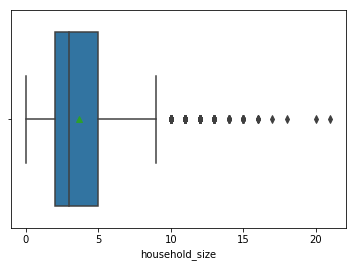

In [0]:
sns.boxplot(FinancialDataset['household_size'],showmeans = True)

There seems to be numerous outliers beyond the threshold. 
Let's try actually confirm the presence of outliers.

**Outliers**

In [0]:
#Check for outliers in the household_size column

Q1 = FinancialDataset.household_size.quantile(0.25)
Q3 = FinancialDataset.household_size.quantile(0.75)

IQR = Q3 - Q1

outliers = ((FinancialDataset.household_size < Q1 - 1.5 * IQR) | (FinancialDataset.household_size > Q3 + 1.5 * IQR))
outliers.value_counts()

False    22964
True       376
Name: household_size, dtype: int64

There are 376 outliers beyond the range threshold.
However it would result in an inconclusive outcome if the outliers are actually removed since they can actually be viable entries.


#### **Descriptive analysis of the Age of Respondent in the Financial Dataset.**

**Mode , Mean and Median**

In [0]:
#Mode of the Age of Respondent column

FinancialDataset.respondent_age.mode()

0    30.0
dtype: float64

In [0]:
#Median of the Age of Respondent column

FinancialDataset.respondent_age.median()

35.0

In [0]:
#Mean of the Age of Respondent column

FinancialDataset.respondent_age.mean()

38.80706940874036

**Range**

In [0]:
#Find the range between the maximum and minimum value

maximum_value = FinancialDataset.respondent_age.max()
minimum_value = FinancialDataset.respondent_age.min()
col_range = maximum_value - minimum_value

print(col_range)

84.0


**Inter-Quartile Range**

In [0]:
#Find the quartiles of the respondent age column

FinancialDataset.respondent_age.quantile([0.25, 0.5, 0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64

**Standard Deviation, Variance, Kurtosis and Skewness**

In [0]:
#Find the Standard Deviation

FinancialDataset.respondent_age.std()  

16.519904564514412

In [0]:
#Find the Variance

FinancialDataset.respondent_age.var()  

272.90724682066417

In [0]:
#Find the Skewness

FinancialDataset.respondent_age.skew()  

0.8406145812311228

In [0]:
#Find the Kurtosis

FinancialDataset.respondent_age.kurt()  

0.09826807013177241

Meaning the kurtosis is leptokurtic, the tail in this distribution is heavy.

Let's plot a boxplot, to gain a visual of the distribution.

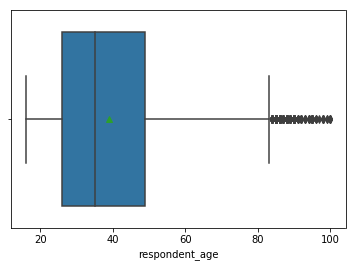

In [0]:
sns.boxplot(FinancialDataset['respondent_age'],showmeans = True)

There seems to be numerous outliers beyond the threshold. 
Let's try actually confirm the presence of outliers.

**Outliers**

In [0]:
#Check for outliers in the respondent_age column

Q1 = FinancialDataset.respondent_age.quantile(0.25)
Q3 = FinancialDataset.respondent_age.quantile(0.75)

IQR = Q3 - Q1

outliers = ((FinancialDataset.respondent_age < Q1 - 1.5 * IQR) | (FinancialDataset.respondent_age > Q3 + 1.5 * IQR))
outliers.value_counts()

False    23101
True       239
Name: respondent_age, dtype: int64

There are 239 outliers beyond the range threshold.
However it would result in an inconclusive outcome if the outliers are actually removed since they can actually be viable entries.


### Bi-variate Analysis

#### Numerical & Numerical Analysis

**A scatter plot comparing the household size and the age of respondent.**

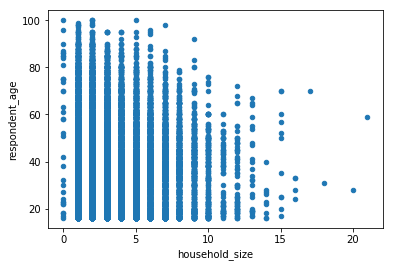

In [0]:
FinancialDataset.plot(x = 'household_size', y = 'respondent_age', kind = 'scatter')

**Correlation**

In [0]:
coeff = FinancialDataset['household_size'].corr(FinancialDataset['respondent_age'])
print(coeff)

-0.1196711523415487


There seems to be a weak correlation coefficient between the two variables; weak correlation.

Let us plot a correaltion heatmap to get a visual.

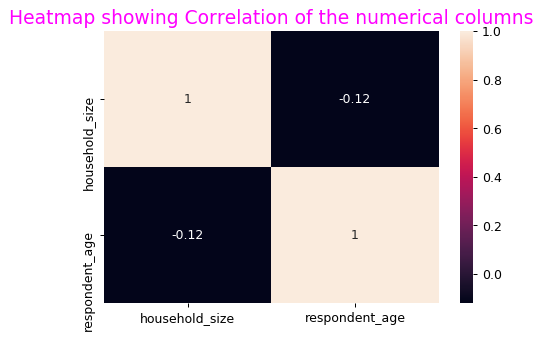

In [0]:
coeff = FinancialDataset.corr()

plt.figure(dpi=90)
sns.heatmap(coeff, xticklabels=coeff.columns, yticklabels=coeff.columns, annot = True)
plt.title('Heatmap showing Correlation of the numerical columns', y = 1.05, color = 'magenta', fontsize = 15)
plt.show()

### Multi-variate Analysis

### Method 1 : Feature Reduction and modelling using PCA (Principal Component Analysis)

Divide the features into the feature set and corresponding labels: X and y respectively.

In [0]:
X = FinancialDataset.drop('has_a_bank_account', axis = 1)
y = FinancialDataset.iloc[:, 2]

Create Dummy Variables to perform Principal Component Analysis easily and accurately with all the associated variable.

Basically encoding the columns with categorical columns.

In [0]:
X = pd.get_dummies(X)

Split the data into training sets and test sets.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Standardize the Data

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Train the model and make predictions.

In [0]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[4959   22]
 [ 777   77]]
0.8630676949443016


Find the variance caused by each of the principal components.

In [0]:
print(pca.explained_variance_ratio_)

[1.20411498e-01 7.70042636e-02 6.92304250e-02 6.42272507e-02
 4.99929888e-02 4.44438889e-02 3.83189341e-02 3.43918291e-02
 3.33936840e-02 3.05477316e-02 2.83304890e-02 2.65995979e-02
 2.50757357e-02 2.41568698e-02 2.38319435e-02 2.36187328e-02
 2.35675471e-02 2.31770699e-02 2.30575812e-02 2.29319958e-02
 2.26169116e-02 2.21831991e-02 2.12010716e-02 2.03582151e-02
 1.93189296e-02 1.84457196e-02 1.47572614e-02 1.38916640e-02
 1.13288169e-02 1.07966865e-02 1.03251835e-02 8.46628455e-03
 2.37469808e-32 1.00837061e-32 6.40938969e-33 4.96802743e-33
 3.15737315e-33 3.12494510e-33 1.90835910e-33 1.18303551e-33
 1.02711029e-33 1.98299262e-34]


The Random Forest Classifier model has an accuracy of 86.3% without specifying the number of components in the PCA analysis

**Apply the PCA concept.**

In [0]:
len(X.columns)

43

In [0]:
warnings.filterwarnings("ignore")
accuracy = {}

for i in range(1, 43):
  
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
  
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  from sklearn.decomposition import PCA
  pca = PCA(n_components = i)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)

  from sklearn.ensemble import RandomForestClassifier
  classifier = RandomForestClassifier(max_depth=2, random_state=0)
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score
  cm = confusion_matrix(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  accuracy.update({'comp-n ' + str(i) : 'accuracy' + str(acc*100)})
  
accuracy


{'comp-n 1': 'accuracy86.18680377035133',
 'comp-n 10': 'accuracy86.30676949443016',
 'comp-n 11': 'accuracy86.8037703513282',
 'comp-n 12': 'accuracy86.47814910025707',
 'comp-n 13': 'accuracy87.06083976006855',
 'comp-n 14': 'accuracy86.6152527849186',
 'comp-n 15': 'accuracy86.66666666666667',
 'comp-n 16': 'accuracy86.99228791773778',
 'comp-n 17': 'accuracy86.76949443016281',
 'comp-n 18': 'accuracy86.52956298200513',
 'comp-n 19': 'accuracy86.54670094258783',
 'comp-n 2': 'accuracy86.59811482433591',
 'comp-n 20': 'accuracy86.88946015424165',
 'comp-n 21': 'accuracy87.1636675235647',
 'comp-n 22': 'accuracy86.75235646958012',
 'comp-n 23': 'accuracy87.09511568123393',
 'comp-n 24': 'accuracy86.51242502142244',
 'comp-n 25': 'accuracy86.52956298200513',
 'comp-n 26': 'accuracy86.76949443016281',
 'comp-n 27': 'accuracy86.88946015424165',
 'comp-n 28': 'accuracy86.75235646958012',
 'comp-n 29': 'accuracy86.7866323907455',
 'comp-n 3': 'accuracy86.32390745501284',
 'comp-n 30': 'acc

In [0]:
maximum = max(accuracy, key=accuracy.get)
print(maximum, accuracy[maximum])

comp-n 21 accuracy87.1636675235647


n- component 21 has the highest accuracy of 87.23%

In [0]:
X.columns[21]

'marital_status_Divorced/Seperated'

From the analysis above,
the overall objective is to create a model which can highly predict whether an individual has a bank account or not, that is why we compare the accuracies to see which model is more reliable.


### Statistical Techniques

Let's test a hypothesis based on the data.

The claim is that the average household size is less than 4 people. The sample is made up of 100 households. The standard deviation is 2.28127.
Is there evidence to support the claim at a significance level of 0.05.
Find the P-Value and test the hypothesis.



Null Hypothesis : The average household is greater than 4 people.

Alternative Hypothesis : The average household is less than 4 people.

In [0]:
#Use random sampling to get a sample of 100 household sizes

FinancialDataset_sample = FinancialDataset.sample(n=100, replace = "False")
FinancialDataset_sample.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
4390,Kenya,2018,No,Urban,Yes,5.0,22.0,Male,Child,Single/Never Married,Primary education,Informally employed
20118,Tanzania,2017,No,Urban,Yes,2.0,50.0,Female,Spouse,Single/Never Married,Primary education,Self employed
14964,Tanzania,2017,No,Rural,Yes,2.0,28.0,Female,Spouse,Single/Never Married,Primary education,Self employed
16985,Tanzania,2017,No,Rural,Yes,3.0,22.0,Female,Parent,Divorced/Seperated,Tertiary education,No Income
10700,Rwanda,2016,No,Rural,Yes,4.0,35.0,Female,Spouse,Married/Living together,Primary education,Farming and Fishing


**Visualize the distribution of the sample dataframe.**

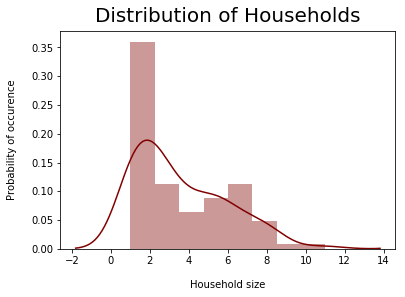

In [0]:
sns.distplot(FinancialDataset_sample['household_size'], color="maroon")
plt.xlabel("Household size", labelpad=14)
plt.ylabel("Probability of occurence", labelpad=14)
plt.title("Distribution of Households", y=1.015, fontsize=20);

In [0]:
FinancialDataset_sample.mean()

household_size     3.54
respondent_age    41.13
dtype: float64

Sample mean = 3.54

In [0]:
from sklearn import preprocessing

# Create x, where x the 'household_size' column's values as floats
x = FinancialDataset_sample[['household_size']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
FinancialDataset_sample_normalized = pd.DataFrame(x_scaled)

# View the dataframe
FinancialDataset_sample_normalized

,0
0,0.4
1,0.1
2,0.1
3,0.2
4,0.3
5,0.0
6,0.7
7,0.4
8,0.0
9,0.4


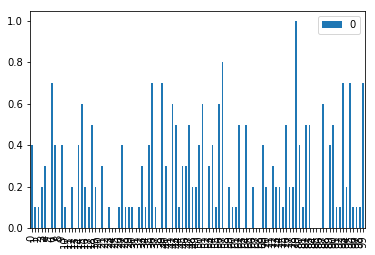

In [0]:
FinancialDataset_sample_normalized.plot(kind='bar')

In [0]:
z_score = (3.54 - 3.68) / (2.28/10)
print(z_score)

-0.6140350877192988


P-Value = 0.2709

Therefore, since the P-value > 0.05, accept the null hypothesis.
There is enough evidence to support the Claim that the average household has more than 4 people.
